<a href="https://colab.research.google.com/github/guptapawan227/Capstone_AIML/blob/Ashish/Capstone_NLP_with_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!pip3 install ftfy

Importing Libraries

In [ ]:
# Using TensorFlow 1.x only in colab as found a issue with 2.3 version used by colab while working with DNN model fit. Did not observe any issue with Tensor flow 2.1 version on local jupyter enviornment.
%tensorflow_version 1.x

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import time, os, sys, itertools, re 
from PIL import Image
import warnings, pickle, string
from dateutil import parser
%matplotlib inline

# Data Visualization
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

from ftfy import fix_text, badness

# Traditional Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sequential Modeling
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Reading the data from excel 

In [2]:
#data=pd.read_excel('/content/drive/MyDrive/Capstone/input_data.xlsx')
data=pd.read_excel('input_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


## Exploratory Data Analysis

In [3]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
assignment_group_count=data['Assignment group'].value_counts()
assignment_group_count.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

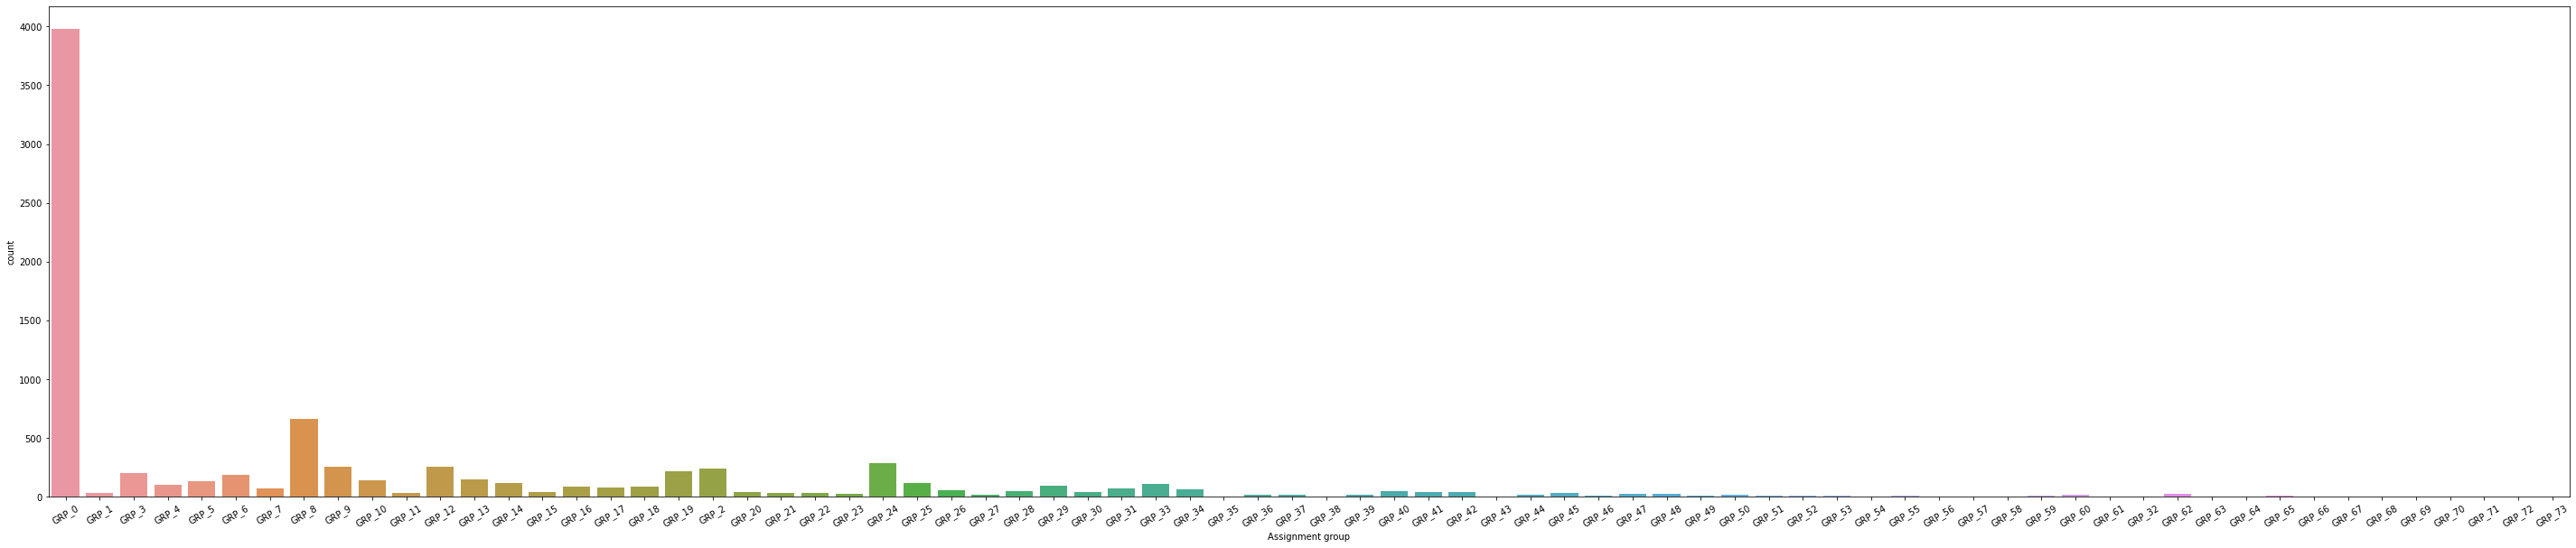

In [5]:
plt.subplots(figsize=(50,10))
ax=sns.countplot(x='Assignment group', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout
plt.show()


In [6]:
assignment_group_count.head(50)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_23      25
GRP_48      25
GRP_62      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_36      15
GRP_44      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
Name: Assignment group, dtype: int64

In [7]:
assignment_group_count.tail(24)

GRP_51    8
GRP_55    8
GRP_49    6
GRP_46    6
GRP_59    6
GRP_43    5
GRP_66    4
GRP_32    4
GRP_58    3
GRP_68    3
GRP_56    3
GRP_38    3
GRP_63    3
GRP_72    2
GRP_54    2
GRP_71    2
GRP_69    2
GRP_57    2
GRP_64    1
GRP_67    1
GRP_61    1
GRP_35    1
GRP_70    1
GRP_73    1
Name: Assignment group, dtype: int64

Check Missing Values in dataframe

In [8]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [9]:
data[data["Short description"].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


### Copy Short Description to Description if the Description value is NaN

In [10]:
data.Description.fillna(data["Short description"], inplace = True)

In [11]:
data[data["Description"].isnull()]

,Short description,Description,Caller,Assignment group


In [12]:
data['Short description'] = data['Short description'].replace(np.nan, '', regex=True)

In [13]:
data.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

## Create a rule based engine

In [14]:
#df_rules = pd.read_csv('/content/drive/MyDrive/Capstone/Rule_matrix.csv')
df_rules = pd.read_csv("Rule_matrix1.csv")

In [15]:
def applyRules(datadf,rulesdf,Description,ShortDescription):
    datadf['pred_group'] = np.nan
    for i, row in rulesdf.iterrows():                  
        for j, row in datadf.iterrows():
            if pd.notna(datadf[ShortDescription][j]):
                if (('erp' in datadf[ShortDescription][j]) and (('EU_tool' in datadf[ShortDescription][j]))):
                        datadf['pred_group'][j] = 'GRP_25'
        for j, row in datadf.iterrows():
            if pd.notna(datadf[Description][j]):
                if (datadf[Description][j] == 'the'):
                    datadf['pred_group'][j] = 'GRP_17' 
                
                if (('finance_app' in ((datadf[ShortDescription][j]) or datadf[Description][j])) and ('HostName_1132' not in datadf[ShortDescription][j])):
                    datadf['pred_group'][j] = 'GRP_55'
                
                if (('processor' in datadf[Description][j]) and ('engg' in datadf[Description][j])):
                    datadf['pred_group'][j] = 'GRP_58'
                
                                     
        if rulesdf['Short Desc Rule'][i] == 'begins with' and rulesdf['Desc Rule'][i] == 'begins with' and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[ShortDescription][j]) and pd.notna(datadf[Description][j]):
                    if ((datadf[ShortDescription][j].startswith(rulesdf['Short Dec Keyword'][i])) and (datadf[Description][j].startswith(rulesdf['Dec keyword'][i]))):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
                        
        if pd.isna(rulesdf['Short Desc Rule'][i]) and rulesdf['Desc Rule'][i] == 'begins with' and pd.notna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[Description][j]) and pd.notna(datadf['Caller'][j]):
                    if ((datadf[Description][j].startswith(rulesdf['Desc Rule'][i]) and (rulesdf['User'][i] == datadf['Caller'][j]))):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
                        
        if rulesdf['Short Desc Rule'][i] == 'contains' and pd.notna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if (pd.notna(datadf[ShortDescription][j]) and pd.notna(datadf['Caller'][j])):
                     if ((rulesdf['Short Dec Keyword'][i] in datadf[ShortDescription][j]) and (rulesdf['User'][i] == datadf['Caller'][j])):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
        if rulesdf['Short Desc Rule'][i] == 'contains' and pd.isna(rulesdf['Desc Rule'][i]) and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[ShortDescription][j]):
                    if (rulesdf['Short Dec Keyword'][i] in datadf[ShortDescription][j]):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
        if pd.isna(rulesdf['Short Desc Rule'][i]) and rulesdf['Desc Rule'][i] == 'begins with' and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[Description][j]):
                    if (datadf[Description][j].startswith(rulesdf['Dec keyword'][i])):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
        if pd.isna(rulesdf['Short Desc Rule'][i]) and rulesdf['Desc Rule'][i] == 'contains' and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[Description][j]):
                    if (rulesdf['Dec keyword'][i] in datadf[Description][j]):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
        if pd.isna(rulesdf['Short Desc Rule'][i]) and rulesdf['Desc Rule'][i] == 'not contain' and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[Description][j]):
                    if (rulesdf['Dec keyword'][i] in datadf[Description][j]):
                        datadf['pred_group'][j] = rulesdf['Group'][i]


        if rulesdf['Short Desc Rule'][i] == 'not contain' and pd.isna(rulesdf['Desc Rule'][i]) and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():

                if pd.notna(datadf[ShortDescription][j]):
                    if (rulesdf['Short Dec Keyword'][i] in datadf[ShortDescription][j]):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
        if pd.isna(rulesdf['Short Desc Rule'][i]) and rulesdf['Desc Rule'][i] == 'not contain' and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[Description][j]):
                    if (datadf[Description][j].startswith(rulesdf['Dec keyword'][i])):
                        datadf['pred_group'][j] = rulesdf['Group'][i]
        if pd.isna(rulesdf['Short Desc Rule'][i]) and rulesdf['Desc Rule'][i] == 'contains' and pd.isna(rulesdf['User'][i]):
            for j, row in datadf.iterrows():
                if pd.notna(datadf[Description][j]):
                    if (rulesdf['Dec keyword'][i] in datadf[Description][j]):
                        datadf['pred_group'][j] = rulesdf['Group'][i]

    return datadf

In [16]:
rules_applied_df = applyRules(data,df_rules,'Description','Short description')
rules_applied_df

,Short description,Description,Caller,Assignment group,pred_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,NaN
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,NaN
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,NaN
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,NaN
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,NaN
...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,NaN
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,NaN
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,NaN
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,NaN


In [17]:
rules_applied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
 4   pred_group         301 non-null    object
dtypes: object(5)
memory usage: 332.2+ KB


In [18]:
rules_applied_df = rules_applied_df[(rules_applied_df['pred_group'].isna())]
rules_applied_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8199 non-null   object
 1   Description        8199 non-null   object
 2   Caller             8199 non-null   object
 3   Assignment group   8199 non-null   object
 4   pred_group         0 non-null      object
dtypes: object(5)
memory usage: 384.3+ KB


In [19]:
assignment_group_count=rules_applied_df['Assignment group'].value_counts()
assignment_group_count.describe()

count      62.000000
mean      132.241935
std       488.873469
min         1.000000
25%        12.250000
50%        33.000000
75%        99.250000
max      3833.000000
Name: Assignment group, dtype: float64

In [ ]:
#rules_applied_df.to_csv("Test_Rule_Trial.csv")

In [20]:
assignment_group_count.head(50)

GRP_0     3833
GRP_8      661
GRP_24     289
GRP_9      252
GRP_12     245
GRP_19     215
GRP_3      200
GRP_2      199
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     112
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_23      25
GRP_48      25
GRP_17      25
GRP_62      25
GRP_60      20
GRP_27      18
GRP_37      16
GRP_44      15
GRP_50      13
GRP_36      13
GRP_39      12
GRP_53      11
GRP_65      11
GRP_52       9
Name: Assignment group, dtype: int64

In [21]:
assignment_group_count.tail(25)

GRP_48    25
GRP_17    25
GRP_62    25
GRP_60    20
GRP_27    18
GRP_37    16
GRP_44    15
GRP_50    13
GRP_36    13
GRP_39    12
GRP_53    11
GRP_65    11
GRP_52     9
GRP_51     8
GRP_49     6
GRP_59     6
GRP_43     5
GRP_46     5
GRP_32     4
GRP_56     3
GRP_57     2
GRP_72     2
GRP_55     1
GRP_68     1
GRP_66     1
Name: Assignment group, dtype: int64

### Concatenate Short Description and Description Column into New Description, drop the previous columns

In [22]:
#Concatenate Short Description and Description columns
rules_applied_df['New Description'] = rules_applied_df['Description'] + ' ' +rules_applied_df['Short description']

clean_data=rules_applied_df.drop(['Short description', 'Description', 'pred_group'], axis=1)


In [23]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Caller            8199 non-null   object
 1   Assignment group  8199 non-null   object
 2   New Description   8199 non-null   object
dtypes: object(3)
memory usage: 256.2+ KB


## Fixing Garbled Text/ Mojibake using ftfy library

In [24]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
# Check the dataset for mojibake impact
clean_data[~clean_data.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Caller,Assignment group,New Description
99,ecprjbod litmjwsy,GRP_0,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...
116,bgqpotek cuxakvml,GRP_0,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...
124,tvcdfqgp nrbcqwgj,GRP_0,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe..."
164,tycludks cjofwigv,GRP_0,\n\nreceived from: abcdri@company.com\n\nwindy...
170,fbvpcytz nokypgvx,GRP_18,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...
...,...,...,...
8470,azxhejvq fyemlavd,GRP_16,"from: mikhghytr wafglhdrhjop \nsent: thursday,..."
8471,xqyjztnm onfusvlz,GRP_30,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥ ç”µ...
8480,nlearzwi ukdzstwi,GRP_9,\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail...
8498,ufawcgob aowhxjky,GRP_62,i am unable to access the machine utilities to...


In [25]:
# Take an example of row# 8471 Short Desc and fix it
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (clean_data['New Description'][8471], 
                                                                        fix_text(clean_data['New Description'][8471])))

# List all mojibakes defined in ftfy library
print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Grabled text: to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥ ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: to 小贺,早上电脑开机开不出来 电脑开机开不出来

Mojibake Symbol RegEx:
 [ÂÃĂ][-€ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¢£¤¥¦§¨ª«¬¯°±²³µ¶·¸¹º¼½¾¿ˇ˘˝]|[ÂÃĂ][›»‘”©™]\w|[¬√][ÄÅÇÉÑÖÜáàâäãåçéèêëíìîïñúùûü†¢£§¶ß®©™≠ÆØ¥ªæø≤≥]|\w√[±∂]\w|[ðđ][Ÿ]|â€|вЂ[љћ¦°№™ќ“”]


In [26]:
# Sanitize the dataset from Mojibakes
clean_data['New Description'] = clean_data['New Description'].apply(fix_text)

# Visualize that row# 8471
clean_data.loc[8471]

Caller                      xqyjztnm onfusvlz
Assignment group                       GRP_30
New Description     to 小贺,早上电脑开机开不出来 电脑开机开不出来
Name: 8471, dtype: object

## Cleaning & Processing the data

In [27]:
def date_validity(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

In [28]:

def process(text_string):
    text=text_string.lower()
    text_string = ' '.join([w for w in text_string.split() if not date_validity(w)])
    text_string = re.sub(r"received from:",'',text_string)
    text_string = re.sub(r"from:",' ',text_string)
    text_string = re.sub(r"to:",' ',text_string)
    text_string = re.sub(r"subject:",' ',text_string)
    text_string = re.sub(r"sent:",' ',text_string)
    text_string = re.sub(r"ic:",' ',text_string)
    text_string = re.sub(r"cc:",' ',text_string)
    text_string = re.sub(r"bcc:",' ',text_string)
    text_string = re.sub(r'\S*@\S*\s?', '', text_string)
    text_string = re.sub(r'\d+','' ,text_string)
    text_string = re.sub(r'\n',' ',text_string)
    text_string = re.sub(r'#','', text_string)
    text_string = re.sub(r'&;?', 'and',text_string)
    text_string = re.sub(r'\&\w*;', '', text_string)
    text_string = re.sub(r'https?:\/\/.*\/\w*', '', text_string)  
    text_string= ''.join(c for c in text_string if c <= '\uFFFF') 
    text_string = text_string.strip()
    text_string = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text_string).split())
    text_string = re.sub(r"\s+[a-zA-Z]\s+", ' ', text_string)
    text_string = re.sub(' +', ' ', text_string)
    text_string = text_string.strip()
    return text_string
  

In [29]:
clean_data["Clean_Description"] = clean_data["New Description"].apply(process)

In [30]:
clean_data

,Caller,Assignment group,New Description,Clean_Description
0,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,verified user details employee and manager nam...
1,hmjdrvpb komuaywn,GRP_0,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hello team my meetings skype meetings etc are ...
2,eylqgodm ybqkwiam,GRP_0,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,hi cannot log on to vpn best cant log in to vpn
3,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr tool page unable to access...
4,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error
...,...,...,...,...
8495,avglmrts vhqmtiua,GRP_29,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,good afternoon am not receiving the emails tha...
8496,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,telephony software issue telephony software issue
8497,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip windows password reset for tifpdchb pedxru...
8498,ufawcgob aowhxjky,GRP_62,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...


## Language Translation

In [ ]:
!pip install langdetect

In [31]:
from langdetect import detect
    
def fn_lang_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

clean_data['language'] = clean_data['Clean_Description'].apply(fn_lang_detect)

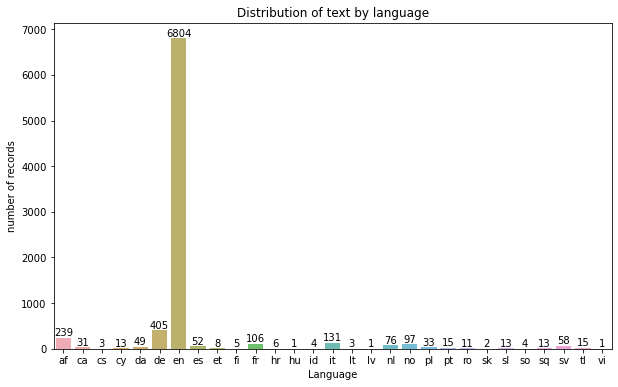

In [32]:
x = clean_data["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english.

In [33]:
german_data = pd.read_csv("/content/drive/MyDrive/Capstone/german.csv")
#german_data = pd.read_csv('german.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Capstone/german.csv'

In [ ]:
german_data

In [ ]:
german_dictionary = german_data.to_dict(orient='records')


In [ ]:

def translate_function(text):
    translated_text = []
    text_split = text.split()
    for text in text_split:
        word_found = False
        for item in range(len(german_dictionary)):
            if text == german_dictionary[item]["German"]:
                translated_text.append(german_dictionary[item]["English"])
                word_found = True
        if word_found == False:
            translated_text.append(text)
    translate = ' '.join([word for word in translated_text])        
    return translate

clean_data["Translated Text"] = clean_data["Clean_Description"].apply(translate_function)

In [ ]:
clean_data.tail(10)

In [ ]:
clean_data[clean_data.language == 'de']

## Data Augmentation

In [ ]:
!pip3 install nltk
import nltk 
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import wordnet

In [ ]:
from collections import OrderedDict
from nltk.tokenize import word_tokenize
def find_synonyms(word):
  synonyms = []
  for synset in wordnet.synsets(word):
    for syn in synset.lemma_names():
      synonyms.append(syn)

  # using this to drop duplicates while maintaining word order (closest synonyms comes first)
  synonyms_without_duplicates = list(OrderedDict.fromkeys(synonyms))
  return synonyms_without_duplicates

In [ ]:
def create_set_of_new_sentences(sentence, max_syn_per_word = 3):
  count = 0
  new_sentences = []
  for word in word_tokenize(sentence):
    if len(word)<=3 : continue 
    for synonym in find_synonyms(word)[0:max_syn_per_word]:
      synonym = synonym.replace('_', ' ') #restore space character
      new_sentence = sentence.replace(word,synonym)
      if count <= 4:
        new_sentences.append(new_sentence)
        count += 1    
  return new_sentences

In [ ]:
med_records=['GRP_8','GRP_3','GRP_12','GRP_2','GRP_13','GRP_19']

low_records=['GRP_24','GRP_9','GRP_6','GRP_10','GRP_5','GRP_14','GRP_25','GRP_33','GRP_4','GRP_29','GRP_18','GRP_16','GRP_17','GRP_31','GRP_7','GRP_34','GRP_26','GRP_40','GRP_28','GRP_41'
,'GRP_15','GRP_30','GRP_42','GRP_20','GRP_45','GRP_22','GRP_1','GRP_11']

vlow_records =['GRP_21','GRP_47','GRP_23','GRP_62','GRP_48','GRP_60','GRP_39','GRP_27','GRP_37','GRP_44','GRP_36','GRP_50','GRP_53','GRP_65','GRP_53','GRP_52','GRP_55','GRP_51','GRP_59','GRP_49','GRP_46','GRP_43','GRP_66','GRP_32','GRP_63','GRP_58','GRP_56','GRP_38','GRP_68','GRP_69','GRP_57','GRP_72','GRP_71','GRP_54','GRP_35','GRP_64','GRP_70','GRP_61','GRP_67','GRP_73']

clean_data1 = clean_data[clean_data["Assignment group"].isin(med_records)]
clean_data2 = clean_data[clean_data["Assignment group"].isin(low_records)]
clean_data3 = clean_data[clean_data["Assignment group"] .isin(vlow_records)]

clean_data4 = clean_data[clean_data["Assignment group"] == 'GRP_0']


Do after this.... 

In [ ]:
clean_data1

In [ ]:
clean_data2

In [ ]:
clean_data3

In [ ]:
clean_data4

In [ ]:
maxsyn=1
#clean_data1["Augmented_data"] = clean_data1["Translated Text"].apply(create_set_of_new_sentences)
clean_data1["Augmented_data"] = clean_data1.apply(lambda x: create_set_of_new_sentences(x['Translated Text'], maxsyn),axis=1)

clean_data1

In [ ]:
s = clean_data1.apply(lambda x: pd.Series(x['Augmented_data']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Final_Text'
clean_data_aug1 = clean_data1.drop(['New Description','Augmented_data', 'Clean_Description', 'Translated Text'],axis=1).join(s)

In [ ]:
init_notebook_mode()
cf.go_offline()

# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', clean_data_aug1['Assignment group'].nunique())

# Histogram
clean_data_aug1['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')

In [ ]:
maxsyn=6
clean_data2["Augmented_data"] = clean_data2.apply(lambda x: create_set_of_new_sentences(x['Translated Text'], maxsyn),axis=1)

clean_data2

In [ ]:
s = clean_data2.apply(lambda x: pd.Series(x['Augmented_data']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Final_Text'
clean_data_aug2 = clean_data2.drop(['New Description','Augmented_data', 'Clean_Description', 'Translated Text'],axis=1).join(s)

In [ ]:
# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', clean_data_aug2['Assignment group'].nunique())

# Histogram
clean_data_aug2['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-2)')

In [ ]:
maxsyn=10
clean_data3["Augmented_data"] = clean_data3.apply(lambda x: create_set_of_new_sentences(x['Translated Text'], maxsyn),axis=1)

clean_data3

In [ ]:
s = clean_data3.apply(lambda x: pd.Series(x['Augmented_data']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Final_Text'
clean_data_aug3 = clean_data3.drop(['New Description','Augmented_data', 'Clean_Description', 'Translated Text'],axis=1).join(s)

In [ ]:
# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', clean_data_aug3['Assignment group'].nunique())

# Histogram
clean_data_aug3['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-4)')

In [ ]:
maxsyn=1
clean_data4["Augmented_data"] = clean_data4.apply(lambda x: create_set_of_new_sentences(x['Translated Text'], maxsyn),axis=1)

clean_data4

In [ ]:
s = clean_data4.apply(lambda x: pd.Series(x['Augmented_data']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Final_Text'
clean_data_aug4 = clean_data4.drop(['New Description','Augmented_data', 'Clean_Description', 'Translated Text'],axis=1).join(s)

In [ ]:
# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', clean_data_aug4['Assignment group'].nunique())

# Histogram
clean_data_aug4['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-5)')

clean_data_mod4 = clean_data4.drop(['New Description', 'Clean_Description'],axis=1)
clean_data_mod4.rename(columns={'Translated Text': 'Final_Text'}, inplace=True)
clean_data_mod4.head()

In [ ]:
dataframes=[clean_data_aug1,clean_data_aug2,clean_data_aug3,clean_data_aug4]
#dataframes=[clean_data_aug1,clean_data_aug2,clean_data_aug3]
clean_data_result= pd.concat(dataframes)

In [ ]:
# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', clean_data_result['Assignment group'].nunique())

# Histogram
clean_data_result['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-5)')

In [ ]:
clean_data_result.shape, clean_data_aug1.shape, clean_data_aug2.shape, clean_data_aug3.shape, clean_data_aug4.shape, 

In [ ]:
# Serialize the translated dataset
clean_data_result.to_csv('Interim_data.csv', index=False, encoding='utf_8_sig')
with open('Interim_data.pkl','wb') as f:
    pickle.dump(clean_data_result, f, pickle.HIGHEST_PROTOCOL)

## Stop words removal and Lemmatise text

In [ ]:
#Stop words removal
nltk.download('stopwords')
from nltk.corpus import stopwords

sr = stopwords.words('english')
for i,text in enumerate(clean_data_result['Final_Text']):
  try:
    clean_data_result['Final_Text'][i]=" ".join(word for word in text.split(' ') if word not in sr)
  except:
    pass

In [ ]:
clean_data_result

In [ ]:
#Lemmatisation using spacy library
!pip install spacy

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

In [ ]:
!pip3 install spacy

In [ ]:
# Need to run "python -m spacy download en" in anaconda prompt to avoid 'en' not found issue.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

clean_data_result['Final_Text'] = clean_data_result['Final_Text'].apply(lemmatize_text)

In [ ]:
clean_data_result

### Attempt to use Google Translate library

In [ ]:
#!pip install goslate

In [ ]:
'''# Define and construct the service urls
domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
urls = ['http://translate.google' + domain for domain in domains]'''

In [ ]:
"""from goslate import Goslate # Provided by Google
import random

# List of column data to consider for translation
trans_cols = ['Clean_Description']

for idx in range(clean_data.shape[0]):
    # Instantiate Goslate class in each iteration
    gs = Goslate(service_urls=random.choice(urls))
    row_iter = gs.translate(clean_data.loc[idx, trans_cols].tolist(), 
                            target_language='en', 
                            source_language='auto')
    clean_data.loc[idx, trans_cols] = list(row_iter)
    time.sleep(30)
    
clean_data.tail()"""

In [ ]:
# Serialize the translated dataset
clean_data_result.to_csv('Final_data.csv', index=False, encoding='utf_8_sig')
with open('Final_data.pkl','wb') as f:
    pickle.dump(clean_data_result, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load the translated pickle file 
with open('/content/Final_data.pkl','rb') as f:
    clean_data = pickle.load(f)

### Univariate visualization
Single-variable or univariate visualization is the simplest type of visualization which consists of observations on only a single characteristic or attribute. Univariate visualization includes histogram, bar plots and line charts.

#### The distribution of Assignment groups
Plots how the assignments groups are scattered across the dataset. The bar chart, histogram and pie chart tells the frequency of any ticket assigned to any group OR the tickets count for each group.

In [ ]:
# Assignment group distribution
print('\033[1mTotal assignment groups:\033[0m', clean_data['Assignment group'].nunique())

# Histogram
clean_data['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')

# Pie chart
assgn_grp = pd.DataFrame(clean_data.groupby('Assignment group').size(),columns = ['Count']).reset_index()
assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='Assignment Group Distribution- Pie Chart (Fig-2)', 
    hoverinfo="label+percent+name", hole=0.25)


### Lets visualize the percentage of incidents per assignment group

In [ ]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=clean_data, order=clean_data["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(clean_data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

In [ ]:
top_20 = clean_data['Assignment group'].value_counts().nlargest(20).reset_index()

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(top_20['index'],top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [ ]:
bottom_20 = clean_data['Assignment group'].value_counts().nsmallest(20).reset_index()

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(bottom_20['index'],bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### The distribution of Callers
Plots how the callers are associated with tickets and what are the assignment groups they most frequently raise tickets for.

In [ ]:
# Find out top 10 callers in terms of frequency of raising tickets in the entire dataset
print('\033[1mTotal caller count:\033[0m', clean_data['Caller'].nunique())
df = pd.DataFrame(clean_data.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
df.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 caller- Pie Chart (Fig-7)',
         colorscale='-spectral',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

In [ ]:
# Top 5 callers in each assignment group
top_n = 5
s = clean_data['Caller'].groupby(clean_data['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

#### The distribution of description lengths
Plots the variation of length and word count of new description attribute

In [ ]:
clean_data.insert(1, 'desc_len', clean_data['Final_Text'].astype(str).apply(len))
clean_data.insert(5, 'desc_word_count', clean_data['Final_Text'].apply(lambda x: len(str(x).split())))
clean_data.head()

In [ ]:
# Description text length
clean_data['desc_len'].iplot(
    kind='bar',
    xTitle='text length',
    yTitle='count',
    colorscale='-ylgn',
    title='Description Text Length Distribution (Fig-11)')

# Description word count
clean_data['desc_word_count'].iplot(
    kind='bar',
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='-bupu',
    title='Description Word Count Distribution (Fig-12)')

### N-Grams
N-gram is a contiguous sequence of N items from a given sample of text or speech, in the fields of computational linguistics and probability. The items can be phonemes, syllables, letters, words or base pairs according to the application. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. 

We'll be using scikit-learn’s CountVectorizer function to derive n-grams and compare them before and after removing stop words. Stop words are a set of commonly used words in any language. We'll be using english corpus stopwords and extend it to include some business specific common words considered to be stop words in our case.

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

# Extend the English Stop Wordss
STOP_WORDS = STOPWORDS.union({'yes','na','hi',
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

# Generic function to derive top N n-grams from the corpus
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

### Top Unigrams

In [ ]:
# Top 50 Unigrams before removing stop words
top_n = 50
ngram_range = (1,1)
uni_grams = get_top_n_ngrams(clean_data.Final_Text, top_n, ngram_range)

df = pd.DataFrame(uni_grams, columns = ['Final_Text' , 'count'])
df.groupby('Final_Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Unigrams in Final_Text')

# Top 50 Unigrams after removing stop words
uni_grams_sw = get_top_n_ngrams(clean_data.Final_Text, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(uni_grams_sw, columns = ['Final_Text' , 'count'])
df.groupby('Final_Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Unigrams in Final_Text without stop words')

### Top Bigrams

In [ ]:
# Top 50 Bigrams before removing stop words
top_n = 50
ngram_range = (2,2)
bi_grams = get_top_n_ngrams(clean_data.Final_Text, top_n, ngram_range)

df = pd.DataFrame(bi_grams, columns = ['Final_Text' , 'count'])
df.groupby('Final_Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Bigrams in Final_Text')

# Top 50 Bigrams after removing stop words
bi_grams_sw = get_top_n_ngrams(clean_data.Final_Text, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(bi_grams_sw, columns = ['Final_Text' , 'count'])
df.groupby('Final_Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Bigrams in Final_Text without stop words')

### Top Trigrams

In [ ]:
# Top 50 Trigrams before removing stop words
top_n = 50
ngram_range = (3,3)
tri_grams = get_top_n_ngrams(clean_data.Final_Text, top_n, ngram_range)

df = pd.DataFrame(tri_grams, columns = ['Final_Text' , 'count'])
df.groupby('Final_Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    colorscale='piyg',
    title=f'Top {top_n} Trigrams in Final_Text')

# Top 50 Trigrams after removing stop words
tri_grams_sw = get_top_n_ngrams(clean_data.Final_Text, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(tri_grams_sw, columns = ['Final_Text' , 'count'])
df.groupby('Final_Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black',
    colorscale='-piyg',
    title=f'Top {top_n} Trigrams in Final_Text without stop words')

### Word Cloud
Let us attempt to visualize this as a word cloud for top three groups that has got maximum records. A word cloud enables us to visualize the data as cluster of words and each words displayed in different font size based on the number of occurences of that word . Basically; the bolder and bigger the word show up in the visualization, it implies its more often it’s mentioned within a given text compared to other words in the cloud and therefore would be more important for us.

Let's write a generic method to generate Word Clouds for both Short and Long Description columns.

In [ ]:
def generate_word_cloud(corpus):
        # Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords=STOP_WORDS,
                    # mask=mask,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [ ]:
# Word Cloud for all tickets assigned to GRP_0
generate_word_cloud(' '.join(clean_data[clean_data['Assignment group'] == 'GRP_0'].Final_Text.str.strip()))

In [ ]:
# Word Cloud for all tickets assigned to GRP_8
generate_word_cloud(' '.join(clean_data[clean_data['Assignment group'] == 'GRP_8'].Final_Text.str.strip()))

In [ ]:
# Word Cloud for all tickets assigned to GRP_25
generate_word_cloud(' '.join(clean_data[clean_data['Assignment group'] == 'GRP_25'].Final_Text.str.strip()))

In [ ]:
# Generate wordcloud for Final_Text field
generate_word_cloud(' '.join(clean_data.Final_Text.str.strip()))

## Prepping Dataframe for Model Building

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
clean_data['Assignment group LabelEncoded']= label_encoder.fit_transform(clean_data['Assignment group']) 
  
clean_data['Assignment group LabelEncoded'].unique()

In [ ]:
label_encoded_dict = dict(zip(clean_data['Assignment group'].unique(), clean_data['Assignment group LabelEncoded'].unique()))
len(label_encoded_dict)

## Feature Extraction : Bag of Words using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()

X_BoW = CV.fit_transform(clean_data['Final_Text']).toarray()
y = clean_data['Assignment group LabelEncoded']

print("Shape of Input Feature :",np.shape(X_BoW))
print("Shape of Target Feature :",np.shape(y))

In [ ]:
# Splitting Train Test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_BoW, y, test_size=0.3, random_state = 1)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

In [ ]:

def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the clasiffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the clasiffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    

## Logistic Regression

In [ ]:
run_classification(LogisticRegression(), X_train, X_test, y_train, y_test)

## Naive Bayes Classifier

In [ ]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

## K-nearest Neighbor

In [ ]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

## Support Vector Machine (SVM)

In [ ]:
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

## Decision Tree

In [ ]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

## Random Forest

In [ ]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
run_classification(GradientBoostingClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

## Deep Neural Networks

In [ ]:
# Load the augmented data from pickle file 
with open('/content/Interim_data.pkl','rb') as f:
    clean_data_DL = pickle.load(f)

In [ ]:
clean_data_DL.isnull().sum()

In [ ]:
clean_data_DL['Final_Text'] = clean_data_DL['Final_Text'].replace(np.nan, '', regex=True)

In [ ]:
clean_data_DL.info()

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
clean_data_DL['Assignment group LabelEncoded']= label_encoder.fit_transform(clean_data_DL['Assignment group']) 
  
clean_data_DL['Assignment group LabelEncoded'].unique()

In [ ]:
label_encoded_dict = dict(zip(clean_data_DL['Assignment group'].unique(), clean_data_DL['Assignment group LabelEncoded'].unique()))
len(label_encoded_dict)

In [ ]:
# Splitting Train Test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data_DL['Final_Text'], clean_data_DL['Assignment group LabelEncoded'], test_size=0.3, random_state = 1)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

### Create checkpoints function

In [ ]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

In [ ]:
# Function to build Neural Network
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(clean_data_DL.Final_Text.astype(str))
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 62)

In [ ]:
run_classification(model_DNN, X_train_tfidf, X_test_tfidf, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='DNN')

'''model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)'''

### Extract Glove Embeddings

In [ ]:
#download the glove embedding zip file from http://nlp.stanford.edu/data/wordvecs/glove.6B.zip
from zipfile import ZipFile
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove.6B/glove.6B.200d.txt'):
    #glove_embeddings = 'glove.6B.zip'
    glove_embeddings = '/content/drive/MyDrive/Capstone/glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove.6B')

# List the files under extracted folder
os.listdir('glove.6B')

## Convolutional Neural Networks (CNN)

In [ ]:
#gloveFileName = 'glove.6B/glove.6B.200d.txt'
gloveFileName = '/content/glove.6B/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

In [ ]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 62)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

## Recurrent Neural Networks (RNN) --> Gated Recurrent Unit (GRU)

In [ ]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 62)
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

## RNN with LSTM networks

In [ ]:
EMBEDDING_DIM = 200
#gloveFileName = 'glove.6B/glove.6B.100d.txt'
gloveFileName = '/content/glove.6B/glove.6B.200d.txt'

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 62)
run_classification(model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')